# D-REX

Minimal procedure:
1. Set input sequence
2. Calculate prior, given
    1. an input sequence to use
    2. parameters, including
        1. distribution (default: gaussian, options: gaussian, lognormal, gmm, poisson)
        2. D (default: 1, 50 for poisson)
3. Add prior to parameters, and optionally set further parameters
    1. hazard (default: 0.01)
    2. obsnz (default: 0.0)
    3. memory (default: inf)
    4. maxhyp (default: inf)
    5. Undocumented: predscale (default: 0.001)
4. Run model, optionally:
    1. Calculate belief dynamics (post_DREX_beliefdynamics.m)
    2. Calculate change decisions (post_DREX_changedecision.m)
    3. Calculate predictive distribution (post_DREX_prediction.m)
6. Interpret results

# 1. Set input sequence

In [1]:
x1 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x2 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1]
x3 = [1, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1, 1, 2, 3, 3, 2, 1]

In [2]:
# a) Single-feature input, e.g.
#input_sequence = x1

# b) Multi-feature input, e.g.
input_sequence = [[x1, x2, x3]]

In [3]:
prior_input_sequence = [[[1,2,3,4], [2,3,4,5], [3,4,5,6]]]

# 2. Calculate prior

In [4]:
from cmme.drex import *

## Choose distribution type and parameters

In [5]:
# a) Gaussian, D = 4
unprocessed_prior = UnprocessedPrior(DistributionType.GAUSSIAN, prior_input_sequence, D = 2)

# 3. Add prior to model / Build model

In [6]:
drex_ib = DREXInstructionBuilder()

drex_ib\
    .prior(unprocessed_prior)\
    .input_sequence(input_sequence)

# 4. Run model

In [7]:
drex_if = drex_ib.to_instructions_file()

drex_model = DREXModel()

drex_rf = drex_model.run_instructions_file(drex_if)

Instructions file written to /var/folders/lx/_yl9nwrs681dpnp5jrv9n6s00000gn/T/tmphvv0pv2l


In [8]:
drex_rf.psi.features()

[0, 1, 2]

In [9]:
drex_rf.psi.positions_by_feature(0)

array([1], dtype=uint8)

In [10]:
drex_rf.psi.prediction_by_feature(0)

array([[0.11190136],
       [0.31593991],
       [0.41860828],
       [0.49901604],
       [0.56755933],
       [0.62820881],
       [0.6834414 ],
       [0.7347787 ],
       [0.78253502],
       [0.82743763],
       [0.87008571],
       [0.91072925],
       [0.94968439],
       [0.98720191],
       [1.02327911],
       [1.05822085],
       [1.09225791],
       [1.12283281],
       [1.15559624],
       [1.1868657 ],
       [1.21710478],
       [1.24473339],
       [1.27492761],
       [1.30337338]])

# 5. Visualize

In [11]:
import matplotlib.pyplot as plt

D-REX's predictions:

In [12]:
f = plt.figure()

# TODO: plot predictions

<Figure size 640x480 with 0 Axes>

D-REX's surprisal (for each feature)

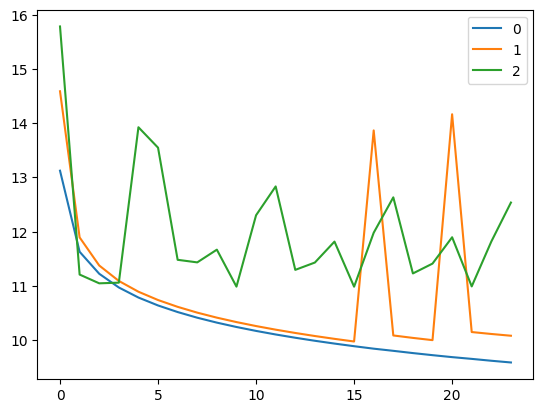

In [13]:
f = plt.figure()

feature_count = drex_rf.surprisal.shape[1]

plt.plot(drex_rf.surprisal)
plt.legend(range(0, feature_count))

Joint surprisal:

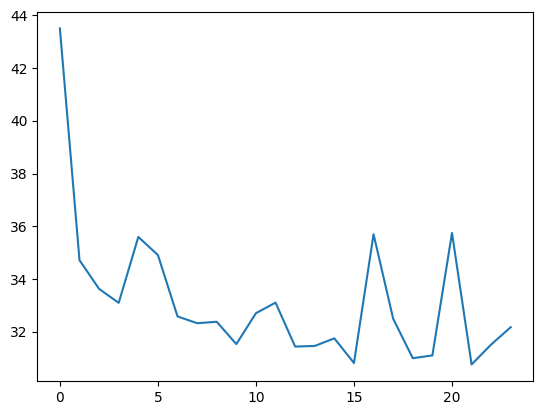

In [14]:
f = plt.figure()

plt.plot(drex_rf.joint_surprisal)

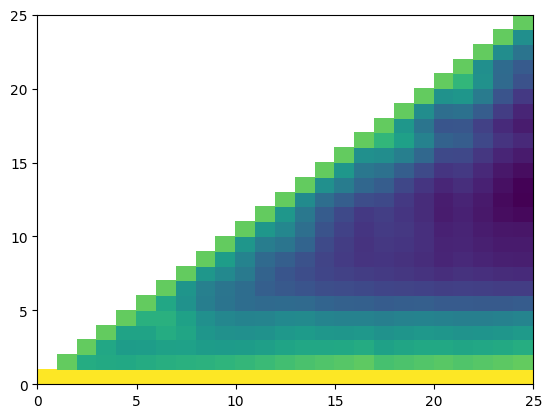

In [15]:
f = plt.figure()

context_beliefs = drex_rf.context_beliefs
context_beliefs[context_beliefs == 0] = np.nan
context_beliefs = np.log10(context_beliefs)

plt.pcolor(context_beliefs)

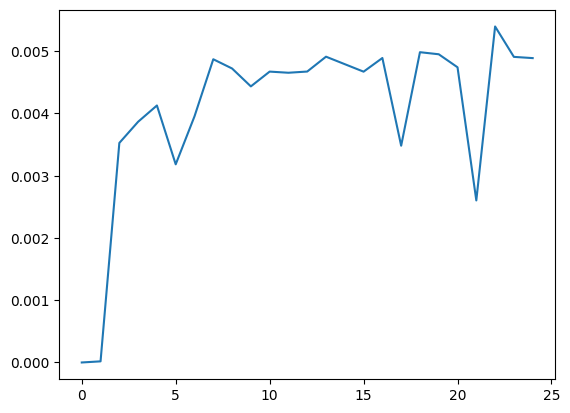

In [16]:
f = plt.figure()

plt.plot(drex_rf.belief_dynamics)

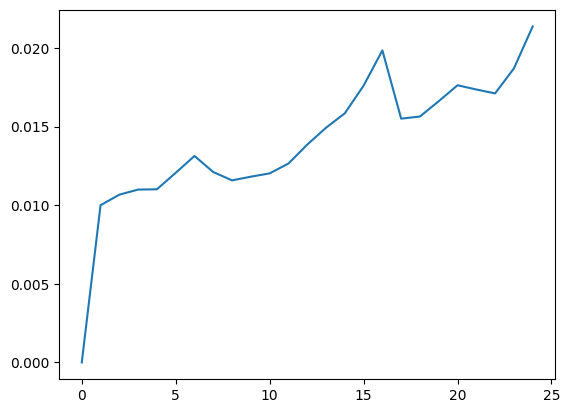

In [17]:
f = plt.figure()

ax = plt.plot(drex_rf.change_decision_probability)

In [18]:
results_file.change_decision_threshold

NameError: name 'results_file' is not defined